In [1]:
import os
import numpy as np
import pandas as pd 

In [2]:
%matplotlib inline

In [3]:
BASE_DATASET = "../../data/mlspec-blackfriday/dataset/raw"
os.makedirs(BASE_DATASET, exist_ok=True)

In [4]:
!gsutil cp -r gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/* $BASE_DATASET/

Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/README.md...
Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/test.csv...
Copying gs://mlteam-ml-specialization-2021-blackfriday/dataset/raw/train.csv...

Operation completed over 3 objects/33.5 MiB.                                     


In [4]:
TRAIN_SET = os.path.join(BASE_DATASET, 'train.csv')
df = pd.read_csv(TRAIN_SET)

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
PRODUCT_COLUMNS = [
    'Product_ID', 'Product_Category_1',
    'Product_Category_2', 'Product_Category_3'
]

df_totals = df.groupby(PRODUCT_COLUMNS).agg(
    {
        'User_ID': 'count',
        'Purchase': ['count', 'sum', 'min', 'mean', 'max', 'std']
    }
)
df_totals.columns = ['_'.join(col) for col in df_totals.columns.values]
df_totals = df_totals.reset_index()

## Product distributions

### Products per product category 1

Text(0, 0.5, 'Product count')

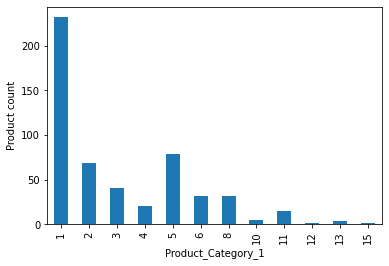

In [10]:
ax = df_totals.groupby(['Product_Category_1'])['Product_ID'].count().plot.bar()
ax.set_ylabel('Product count')

Text(0, 0.5, 'Product count')

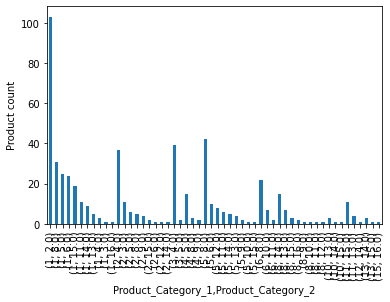

In [13]:


ax = df_totals.groupby(['Product_Category_1'])['Product_Category_2'].value_counts().plot.bar()
ax.set_ylabel('Product count')

Text(0, 0.5, 'Number of non null Product_Category_2')

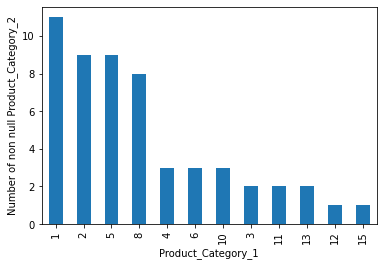

In [37]:
# need to fill nulls...
ax = df_totals.groupby(['Product_Category_1'])['Product_Category_2'].nunique().sort_values(ascending=False).plot.bar()
ax.set_ylabel('Number of non null Product_Category_2')

<AxesSubplot:xlabel='Product_Category_1'>

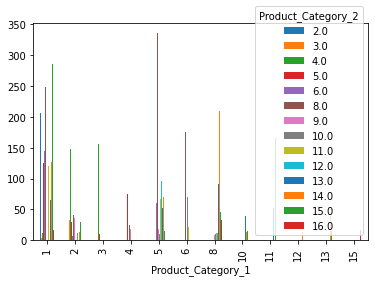

In [36]:
df_totals.groupby(['Product_Category_1', 'Product_Category_2'])['Product_Category_2'].sum().unstack().plot.bar()

## Purchase distributions

### Purchases per product category 1

Text(0, 0.5, 'Purchase count')

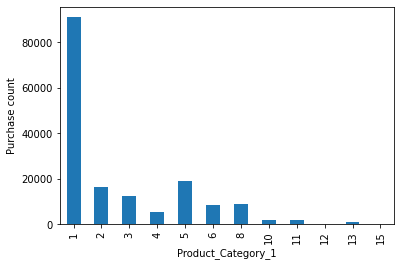

In [11]:
ax = df_totals.groupby(['Product_Category_1'])['Purchase_count'].sum().plot.bar()
ax.set_ylabel('Purchase count')